In [ ]:
#aug_train.csv


### Задание 5.1

Загрузите датасет о клиентах страховой компании. Целевой переменной для предсказания в этом датасете является столбец 'Vehicle_Damage', который показывает, будет ли клиент заинтересован в страховании транспортных средств. С помощью LabelEncoder из sklearn.preprocessing закодируйте 'Vehicle_Damage'.

Можно ли считать целевую переменную сбалансированной?

In [11]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [12]:
from google.colab import drive
drive.mount('/content/drive')
PATH = '/content/drive/MyDrive/SkillFactory/DS_ML_data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df = pd.read_csv(PATH+ 'aug_train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


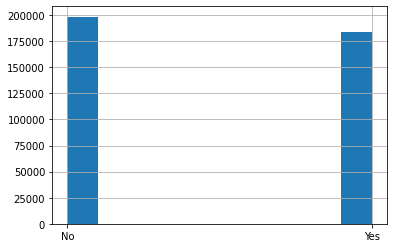

In [15]:
df.Vehicle_Damage.hist()        

In [16]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.apply(LabelEncoder().fit_transform)
df_encoded.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,139098,1,2,1,7,1,1,0,0,146,6,0
1,14263,1,22,1,28,0,0,1,26500,24,125,0
2,26628,0,46,1,33,0,0,1,19017,119,243,0
3,72656,0,2,1,33,0,1,0,10821,146,59,0
4,378943,1,8,1,46,1,1,0,12199,146,201,0


## k-fold validation

## Задание 5.3


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
estimator = LogisticRegression()


In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits=3)
estimator = LogisticRegression()
np.mean(cross_val_score(estimator, df_encoded.drop('Vehicle_Damage', axis = 1), df_encoded.Vehicle_Damage, scoring ='accuracy',cv =kf))

0.6379234556151803

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target'] = le.fit_transform(df.Vehicle_Damage .values)



Какое значение метрики  получится, если запустить кросс-валидацию с GradientBoostingClassifier и с необходимым типом k-fold-разбиения с тремя итерациями? В качестве признаков возьмите все столбцы с типом int64 и float64. Ответ округлите до двух знаков.

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [41]:
df_dtype = df.select_dtypes(include=['int64','float64'])
df_dtype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Age                   382154 non-null  int64  
 2   Driving_License       382154 non-null  int64  
 3   Region_Code           382154 non-null  float64
 4   Previously_Insured    382154 non-null  int64  
 5   Annual_Premium        382154 non-null  float64
 6   Policy_Sales_Channel  382154 non-null  float64
 7   Vintage               382154 non-null  int64  
 8   Response              382154 non-null  int64  
 9   target                382154 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 29.2 MB


In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits=3)
estimator = LogisticRegression()
np.mean(cross_val_score(estimator, df_dtype.drop('target', axis = 1), df_dtype.target, scoring ='accuracy',cv =kf))

0.6370860957379184

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits=3)
estimator = GradientBoostingClassifier(n_iter_no_change=3)
np.mean(cross_val_score(estimator, df_dtype.drop('target', axis = 1), df_dtype.target, scoring ='accuracy',cv =kf))

0.9275998659717741

## Задание 5.4

Загрузите датасет о бездомных питомцах и скорости принятия их в семью по различным характеристикам.

Можно ли считать целевую переменную «скорость принятия» (AdoptionSpeed) сбалансированной?

In [57]:
#adoption_prediction
df = pd.read_csv(PATH+ 'adoption_prediction.csv')
df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


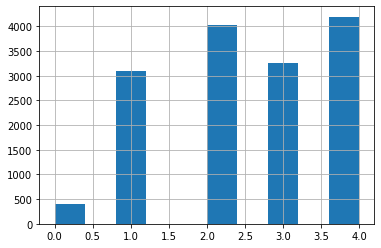

In [58]:
df.AdoptionSpeed.hist()

## Задание 5.6

Какое значение метрики  получится, если запустить кросс-валидацию с GradientBoostingClassifier и с необходимым типом k-fold-разбиения с тремя итерациями? Для обучения используйте признаки: 'Type','Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 'State','PhotoAmt','VideoAmt'. Ответ округлите до одного знака.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14992 entries, 0 to 14991
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14992 non-null  int64  
 1   Name           13735 non-null  object 
 2   Age            14992 non-null  int64  
 3   Breed1         14992 non-null  int64  
 4   Breed2         14992 non-null  int64  
 5   Gender         14992 non-null  int64  
 6   Color1         14992 non-null  int64  
 7   Color2         14992 non-null  int64  
 8   Color3         14992 non-null  int64  
 9   MaturitySize   14992 non-null  int64  
 10  FurLength      14992 non-null  int64  
 11  Vaccinated     14992 non-null  int64  
 12  Dewormed       14992 non-null  int64  
 13  Sterilized     14992 non-null  int64  
 14  Health         14992 non-null  int64  
 15  Quantity       14992 non-null  int64  
 16  Fee            14992 non-null  int64  
 17  State          14992 non-null  int64  
 18  Rescue

In [62]:
cols = ['Type','Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 'State','PhotoAmt','VideoAmt']

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14992 entries, 0 to 14991
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14992 non-null  int64  
 1   Name           13735 non-null  object 
 2   Age            14992 non-null  int64  
 3   Breed1         14992 non-null  int64  
 4   Breed2         14992 non-null  int64  
 5   Gender         14992 non-null  int64  
 6   Color1         14992 non-null  int64  
 7   Color2         14992 non-null  int64  
 8   Color3         14992 non-null  int64  
 9   MaturitySize   14992 non-null  int64  
 10  FurLength      14992 non-null  int64  
 11  Vaccinated     14992 non-null  int64  
 12  Dewormed       14992 non-null  int64  
 13  Sterilized     14992 non-null  int64  
 14  Health         14992 non-null  int64  
 15  Quantity       14992 non-null  int64  
 16  Fee            14992 non-null  int64  
 17  State          14992 non-null  int64  
 18  Rescue

## stratified k-fold

In [64]:
>>> import numpy as np
>>> from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

kf = StratifiedKFold(n_splits=3)
estimator = GradientBoostingClassifier()
np.mean(cross_val_score(estimator, df[cols], df['AdoptionSpeed'], scoring ='accuracy',cv =kf))

0.40041286343101046

## Задание 5.7

Если разбить эти данные с помощью train_test_split на две выборки без перемешивания (shuffle=False) пополам (test_size=0.5) и сравнить распределения признаков из предыдущего задания ('Type','Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2','Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed','Sterilized', 'Health', 'Quantity', 'Fee', 'State','PhotoAmt','VideoAmt'), какое медианное значение дивергенции Кульбака-Лейблера получится (np.median(kl_div(...)))? Ответ округлите до двух знаков.

In [71]:
from sklearn.model_selection import train_test_split
from scipy.special import kl_div

X_train, X_test = train_test_split(df[cols],test_size=0.5, shuffle=False)
np.median(kl_div(X_train[cols].values, X_test[cols].values))

0.06801529621588998